In [169]:
import import_ipynb
from generate_false_data import *

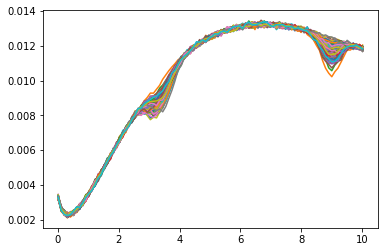

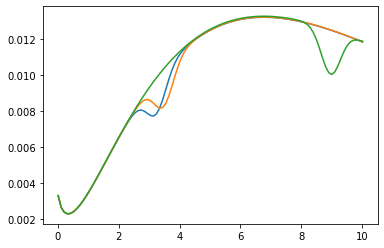

In [175]:
import matplotlib.pyplot as plt

XF, A, F, I, cents = generateFalseData(100,100,3,0.02,0)
plt.plot(XF, I.T)
plt.show()

plt.plot(XF, F.T)
plt.show()

In [171]:
def get_quantile_diff_dist(tI, q) :
    NN = tI.shape[0]
    diffs = np.zeros([int(NN*(NN-1)/2),tI.shape[1]])
    
    ind=0
    for i in range(NN) :
        for j in range(i) :
            diffs[ind,:] = (tI[i,:] - tI[j,:])**2
            ind+=1
    
    return np.quantile(diffs, q, axis=0)

In [176]:
vlamb95 = get_quantile_diff_dist(I,0.68)

In [167]:
def compute_loss(fi,fj,si,sj) :
    tc = (fi-fj)**2
    th = (tc < vlamb95).astype('float')
    tc = np.sum(tc*th)/np.sum(th)
    ts = (si-sj)**2
    
    return tc-ts
    

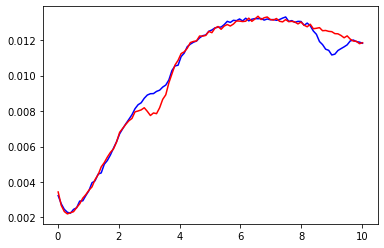

In [178]:
lowest_loss = float('inf')
lowest_loss_i = 0
lowest_loss_j = 1

for i in range(I.shape[0]) :
    for j in range(i) :
        tfi = I[i,:]
        tfj = I[j,:]
        tsi = A[0,i]
        tsj = A[0,j]
        
        tloss = compute_loss(tfi,tfj,tsi,tsj)
        if tloss < lowest_loss :
            lowest_loss = tloss
            lowest_loss_i = i
            lowest_loss_j = j
            
plt.plot(XF, I[lowest_loss_i,:],color='b')
plt.plot(XF, I[lowest_loss_j,:],color='red')
plt.show()

In [179]:
print(cents)

[3.24356292 3.48133309 8.96613543]


In [145]:
print(A[:,lowest_loss_i])
print(A[:,lowest_loss_j])
print(lowest_loss)

[0.80105658 0.00300298 0.19594044]
[0.00185398 0.74192645 0.25621957]
-0.638724789843804


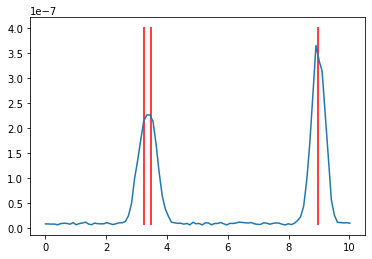

In [177]:
plt.plot(XF, vlamb95)
plt.vlines(x=cents,ymin=min(vlamb95),ymax=max(vlamb95)*1.1, color='r')
plt.show()